# **Ejercicio 1**

## **Librerias necesarias**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
import warnings
warnings.filterwarnings('ignore')

## **DataFrame**

Inicialmente, se hace la descarga del conjunto de datos y se formatea como un DataFrame de pandas. 

In [2]:
# Se descarga el conjunto de datos.
olimpicos_url = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"

In [3]:
df_olimpicos = pd.read_csv(olimpicos_url) # Se lee el DataFrame.
df_olimpicos.head() # Se muestran las primeras 5 observaciones.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## **Inciso 1**
**Generar un gráfico que indique el número de medallas concedidas en cada uno de los cinco principales deportes en 2016.**

El primer paso para resolver este inciso es filtrar el DataFrame donde solo se incluyan las filas correspondientes a los ganadores de medallas de 2016.

In [4]:
med_2016 = df_olimpicos.loc[(df_olimpicos['Year'] == 2016) & (df_olimpicos['Medal'].notna())]
med_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


Ahora, se observan las medallas ganadas en cada deporte durante el año 2016.

In [5]:
med_dep = med_2016.groupby('Sport')['Medal'].count().reset_index() 
# Se usa groupby para dividir los datos por categorías de deportes y contar las medallas en cada uno de ellos.
print(med_dep) 

                    Sport  Medal
0                 Archery     24
1               Athletics    192
2               Badminton     24
3              Basketball     72
4        Beach Volleyball     12
5                  Boxing     51
6                Canoeing     82
7                 Cycling     84
8                  Diving     36
9           Equestrianism     45
10                Fencing     65
11               Football    106
12                   Golf      6
13             Gymnastics     66
14               Handball     89
15                 Hockey     99
16                   Judo     56
17      Modern Pentathlon      6
18    Rhythmic Gymnastics     18
19                 Rowing    144
20           Rugby Sevens     74
21                Sailing     45
22               Shooting     45
23               Swimming    191
24  Synchronized Swimming     32
25           Table Tennis     24
26              Taekwondo     32
27                 Tennis     24
28           Trampolining      6
29        

Luego, se ordenan los deportes dependiendo las cantidades de medallas registradas en cada uno de ellos (De mayor a menor) y se crea un nuevo DataFrame (`med_ord`) que se usará para filtrar los registros de los cinco deportes principales en 2016. 

In [6]:
med_ord = med_dep.sort_values(by = 'Medal', ascending = False).head(5)
med_ord

,Sport,Medal
1,Athletics,192
23,Swimming,191
19,Rowing,144
11,Football,106
15,Hockey,99


Finalmente, se genera un gráfico de barras con los recuentos de registros correspondientes a cada uno de los cinco deportes principales durante el año 2016.

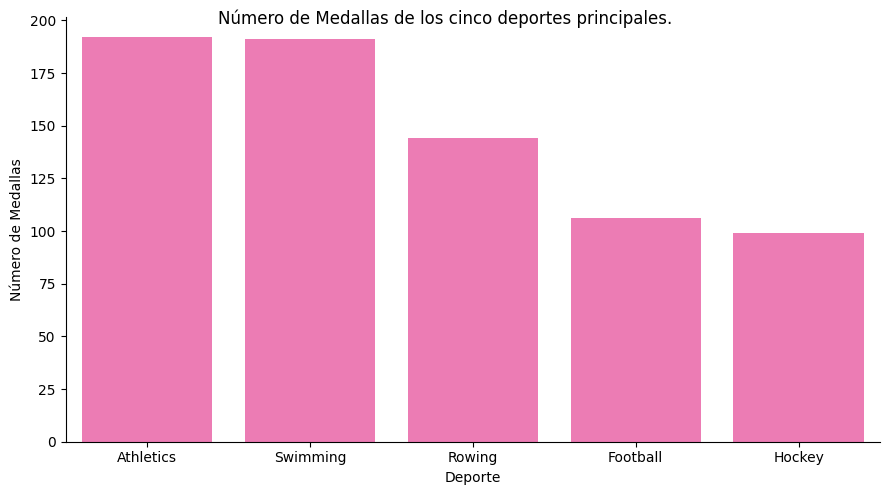

In [7]:
ax = sns.catplot(data = med_ord, x = 'Sport', y = 'Medal', kind = 'bar', aspect = 1.8 , color = '#FF69B4')
# Configuración de la gráfica
ax.set_axis_labels('Deporte', 'Número de Medallas')
ax.figure.suptitle('Número de Medallas de los cinco deportes principales.')
plt.show()

## **Inciso 2** 
**Trazar un gráfico que represente la distribución de la edad de los ganadores de medallas en los cinco principales deportes en 2016.**

Se filtra el DataFrame anteriormente creado (`med_2016`), donde se encuentran todos los registros de medallas obtenidas en 2016 y se usa el método `.isin` para indicar que solo se muestren los registros de los cinco deportes con más medallas en 2016. 

In [8]:
dep_pri = med_2016[med_2016['Sport'].isin(med_ord['Sport'])]
dep_pri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


Luego se genera un histograma para la característica Edad (`Age`) de todos los ganadores de medallas en los cinco deportes principales (2016).

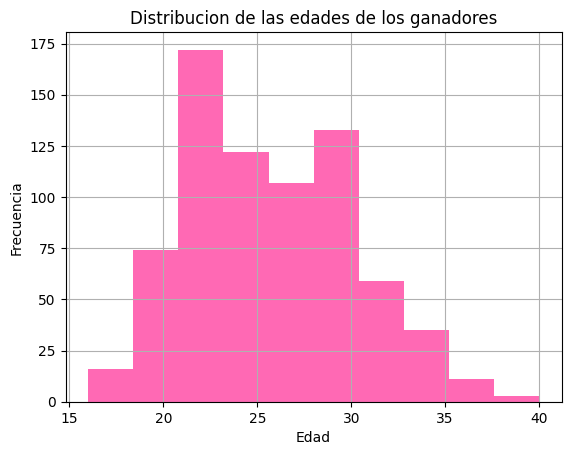

In [9]:
ax = dep_pri.hist(column = 'Age', color = '#FF69B4')[0][0] 
# Esta función devuelve un array de ejes, por lo que seleccionamos el primero ([0][0]) para personalizarlo.
# Personalizar el histograma
ax.set_title('Distribucion de las edades de los ganadores')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
plt.show()

## **Inciso 3**
**Descubrir qué equipos nacionales ganaron el mayor número de medallas en los cinco principales deportes en 2016.**

Para la solución de este inciso, es fundamental organizar los datos anteriormente filtrados de los cinco principales deportes en 2016 (`dep_pri`). La organización se hará por equipos (paises). Seguido a ello se organizan de mayor a menor la cantidad de medallas obtenidas y se muestran los cinco equipos que ganaron la mayor cantidad de medallas en los cinco principales deportes en 2016. 

In [10]:
dep_equipos = dep_pri.groupby('Team')['Medal'].count().reset_index().sort_values(by = 'Medal', ascending = False).head()
dep_equipos # Cantidad de medallas obtenidas en cada país (solo teniendo en cuenta los cinco deportes principales en 2016)

,Team,Medal
52,United States,127
20,Germany,88
21,Great Britain,69
10,Canada,45
2,Australia,43


Ahora, se mostrará a detalle cada una de las medallas obtenidas en los diferentes cinco deportes principales en 2016 para cada pais. 

In [11]:
team_sport = (dep_pri.groupby(['Team', 'Sport'])
                     ['Medal'].count() # Agrupa por equipo y deporte, y cuenta las medallas.
                     .reset_index(name = 'Count'))  # Convierte el resultado en un DataFrame y agrega las cantidades de medallas obtenidas 

dep_team  = team_sport[team_sport['Team'].isin(dep_equipos['Team'])]
dep_team

,Team,Sport,Count
2,Australia,Athletics,2
3,Australia,Rowing,9
4,Australia,Swimming,32
17,Canada,Athletics,10
18,Canada,Football,18
19,Canada,Rowing,2
20,Canada,Swimming,15
38,Germany,Athletics,3
39,Germany,Football,35
40,Germany,Hockey,33


Por último se genero un gráfico de barras que indica cuántas medallas ganó el equipo de cada país en los cinco deportes principales en 2016. 

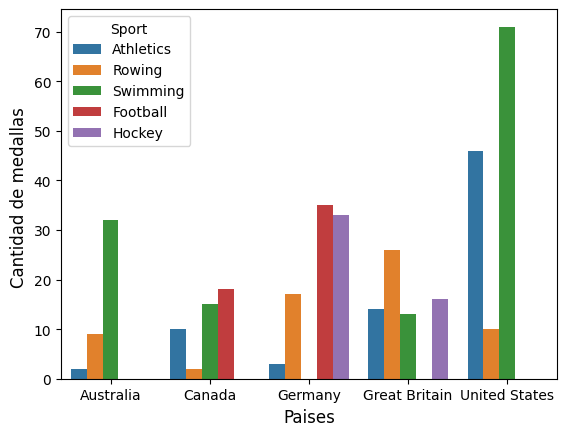

In [12]:
ax = sns.barplot(x = 'Team', y = 'Count', hue = 'Sport', data = dep_team )
ax.set_xlabel('Paises', fontdict = {'fontsize' : 12})
ax.set_ylabel('Cantidad de medallas ', fontdict = {'fontsize' : 12})
plt.show()

## **Inciso 4**
**Observar la tendencia del peso medio de los atletas masculinos y femeninos ganadores en los cinco principales deportes en 2016**

Se genera un gráfico de barras que indica el peso medio de los jugadores, clasificados en función del género, que ganaron en los cinco principales deportes en 2016.

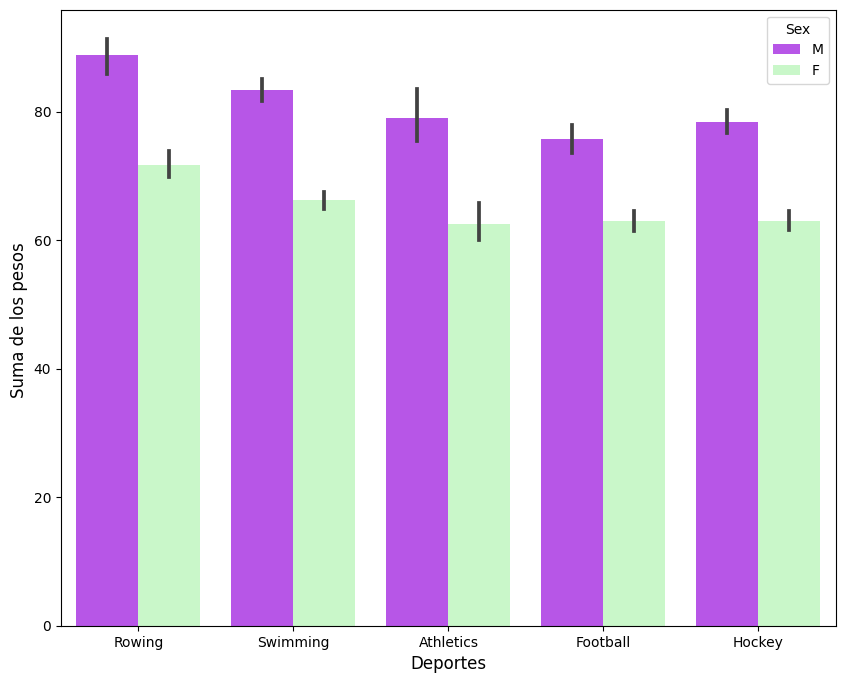

In [19]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x = "Sport", y = 'Weight', 
                 hue = 'Sex', data = dep_pri, 
                 estimator = mean,
                 palette = ['#BF3EFF', '#C1FFC1'])
ax.set_xlabel('Deportes', fontdict = {'fontsize' : 12})
ax.set_ylabel('Suma de los pesos ', fontdict = {'fontsize' : 12})
plt.show()
